


#**Predicting Data Scientist Salaries**

This notebook embarks on a journey to explore and predict the salaries of data scientist jobs using a comprehensive dataset from 2023. The aim is to leverage machine learning techniques to understand the factors influencing data scientist salaries and to build a model that can accurately predict these salaries based on various job-related features.

#**Dataset Dictionary**


*   **work_year**: The year in which the data was recorded. This field

indicates the temporal context of the data, important for
 understanding salary trends over time.

*   **job_title**: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

*   **job_category**: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

*   **salary_currency**: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

*   **salary**: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

*   **salary_in_usd**: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.
*   employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

*   **experience_level**: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.
*   employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

* **work_setting**: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.
*   company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

*  **company_size**: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.










#**Import Libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


#**Importing Dataset**

In [2]:
df = pd.read_csv('/content/jobs_in_data.csv')

In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


Checking null values

In [3]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [6]:
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [7]:
print ("Job Category: ", df['job_category'].unique())
print ("Job Titles: ", df['job_title'].unique())
print ("Experience Levels: ", df['experience_level'].unique())
print ("Employment Type: ", df['employment_type'].unique())

Job Category:  ['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Quality and Operations' 'Data Management and Strategy'
 'Cloud and Database']
Job Titles:  ['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data S

# **Exploratory Data Analysis (EDA)**

Let's create some simple plots to check out the data!  

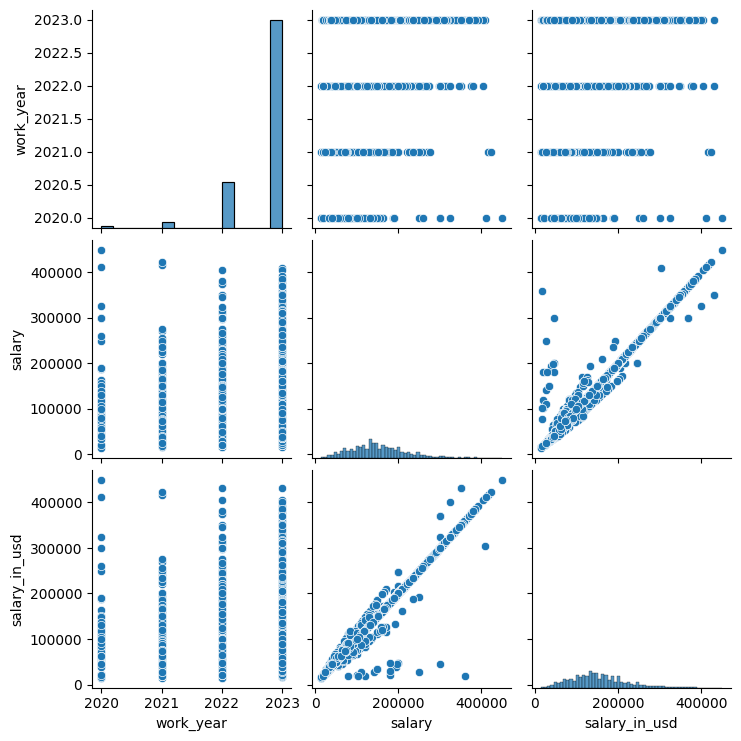

In [8]:
sns.pairplot(df)

**Observations:**


1.   Salary histograms show a right-skewed distribution, indicating more lower salaries and fewer high salaries.
2.   Yearly scatter plots reveal distinct salary ranges per year without a clear trend over time.

3. Salary vs Salary in USD plots show a straight line, indicating salaries were converted using a consistent exchange rate.





<ipython-input-9-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

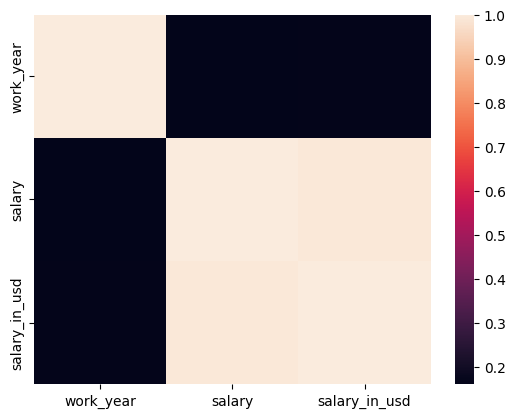

In [9]:
sns.heatmap(df.corr())

**Observations:**


The heatmap shows a high correlation between salary and salary in USD which is expected as they represent the same value in different currencies.

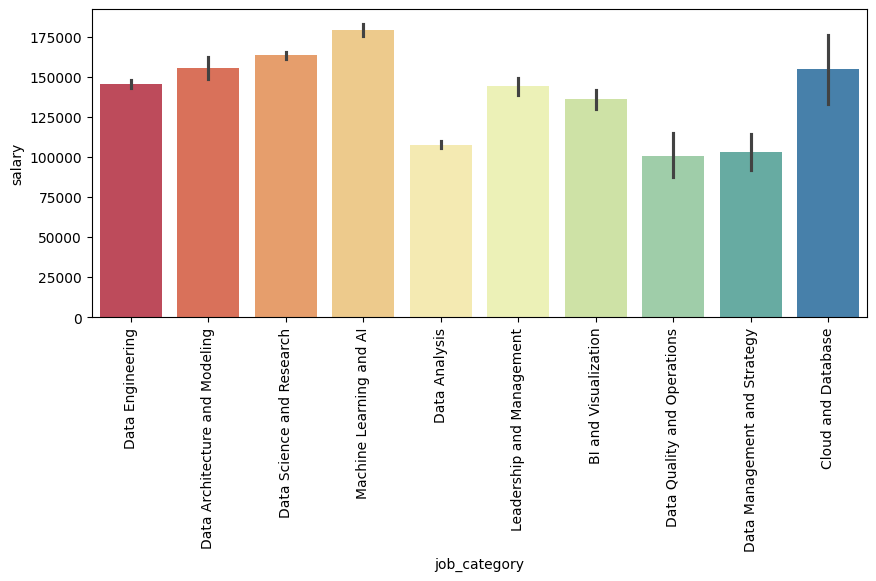

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x=df['job_category'], y=df['salary'],hue=df['job_category'], legend=False, palette='Spectral')
plt.xticks(rotation=90)
plt.show()

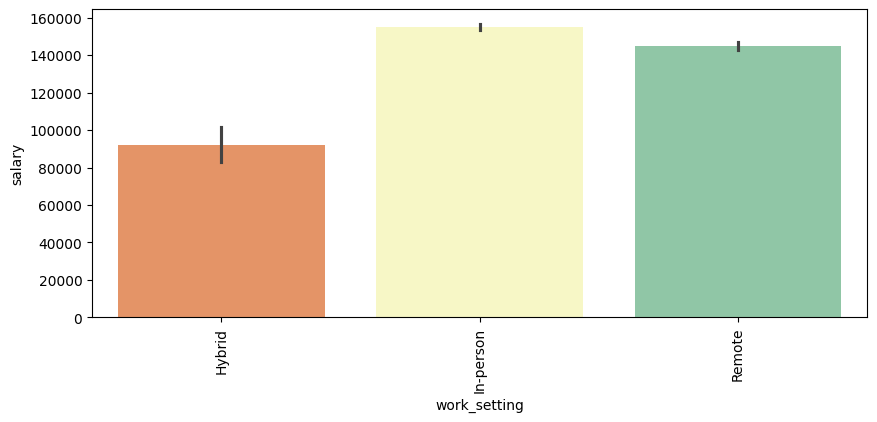

In [11]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x=df['work_setting'], y=df['salary'], hue=df['work_setting'], legend=False, palette='Spectral')
plt.xticks(rotation=90)
plt.show()

**Observations:**

It can be inferred that in-person jobs pay the most and remote jobs pay relatively high but hybrid the least.

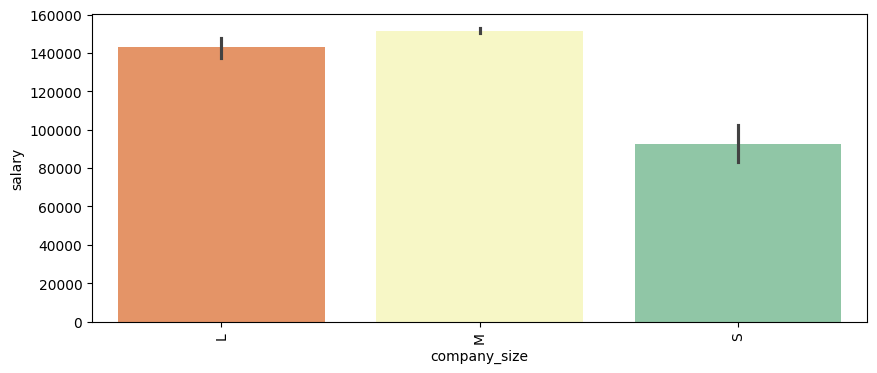

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x=df['company_size'], y=df['salary'], hue=df['company_size'], legend=False, palette='Spectral')
plt.xticks(rotation=90)
plt.show()

**Observations:**

There is not much difference in salary when it comes to large and medium-sized companies however smaller companies tend to pay less.

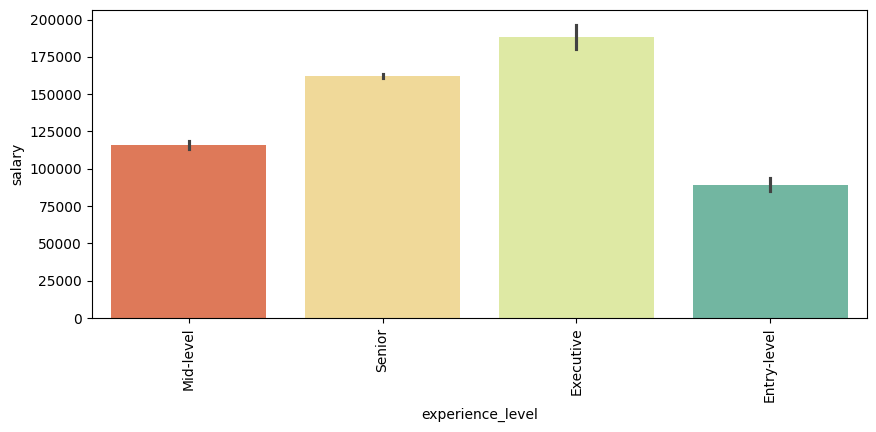

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x=df['experience_level'], y=df['salary'], hue=df['experience_level'],legend=False, palette='Spectral')
plt.xticks(rotation=90)
plt.show()

**Observations:**

The salary follows a top-down hierarchy when compared with the experience level as executives at high rank are paid the most then senior, mid-level, and entry-level the least.



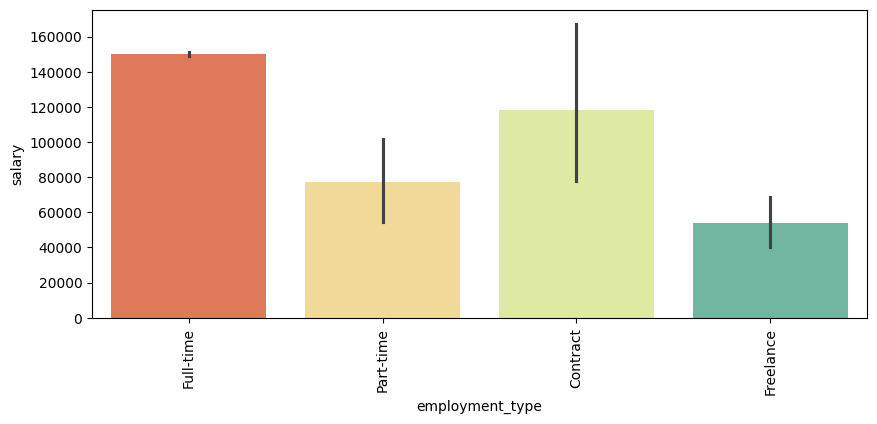

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x=df['employment_type'], y=df['salary'], hue=df['employment_type'],legend=False, palette='Spectral')
plt.xticks(rotation=90)
plt.show()

**Observations:**

Full-time employees are paid the most when compared with the rest.



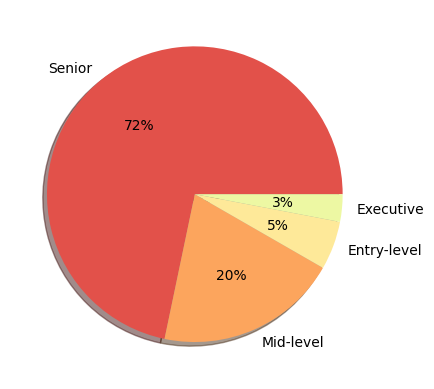

In [ ]:
plt.pie(df['experience_level'].value_counts(),
        autopct='%0.0f%%',
        labels=["Senior","Mid-level","Entry-level","Executive"],
        colors=sns.color_palette('Spectral'),
        shadow=True,
        )

plt.show()

**Observations:**

The pie chart shows that there are more job offers for senior level.



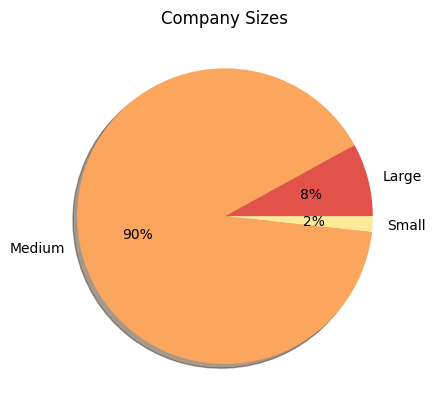

In [17]:
plt.pie(df.groupby("company_size")["company_size"].value_counts(),
        autopct='%0.0f%%',
        labels=["Large","Medium","Small"],
        colors=sns.color_palette('Spectral'),
        shadow=True,
        )
plt.title('Company Sizes')
plt.show()

**Observations:**

Most jobs are being offered by medium-sized companies and small companies offer the least.



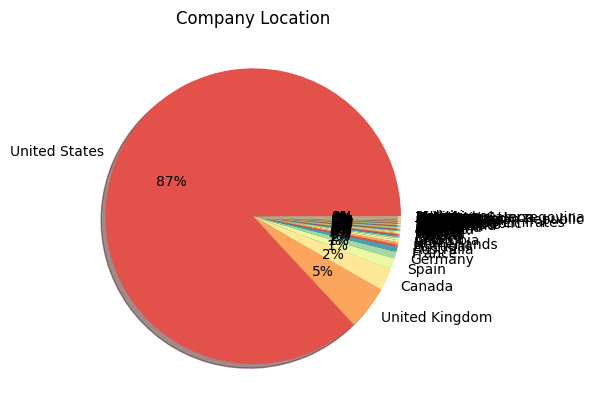

In [19]:
x = df["company_location"].value_counts()

plt.pie(x,
        autopct='%0.0f%%',
        labels=x.index,
        colors=sns.color_palette('Spectral'),
        shadow=True,
        )
plt.title('Company Location')
plt.show()

**Observations:**

Most of the companies are based in the USA so the countries feature may be filtered.

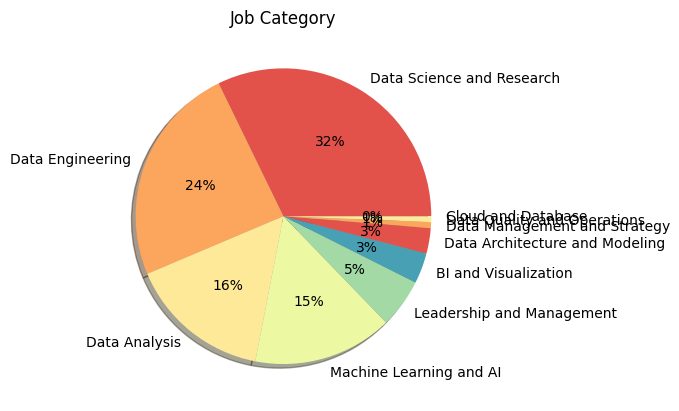

In [20]:
x = df["job_category"].value_counts()

plt.pie(x,
        autopct='%0.0f%%',
        labels=x.index,
        colors=sns.color_palette('Spectral'),
        shadow=True,
        )
plt.title('Job Category')
plt.show()

**Observations:**

There is a variation in the number of jobs per category hence this may be a relevant feature.

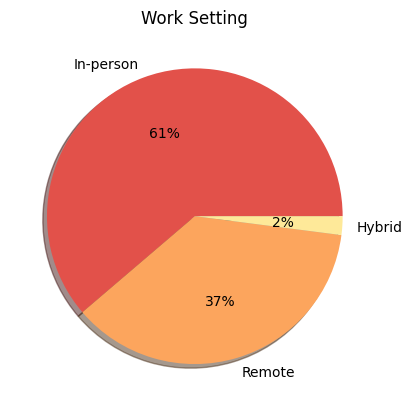

In [21]:
x = df["work_setting"].value_counts()

plt.pie(x,
        autopct='%0.0f%%',
        labels=x.index,
        colors=sns.color_palette('Spectral'),
        shadow=True,
        )
plt.title('Work Setting')
plt.show()

**Observations:**

Most jobs are in-person and very few are hybrid.

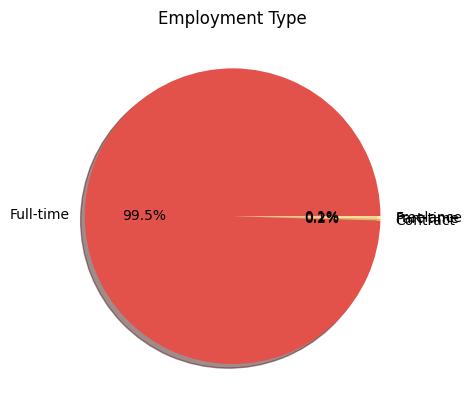

In [28]:
x = df["employment_type"].value_counts()

plt.pie(x,
        autopct='%1.1f%%',
        labels=x.index,
        colors=sns.color_palette('Spectral'),
        shadow=True,
        )
plt.title('Employment Type')
plt.show()

**Observations:**

Almost all of the jobs are full-time.

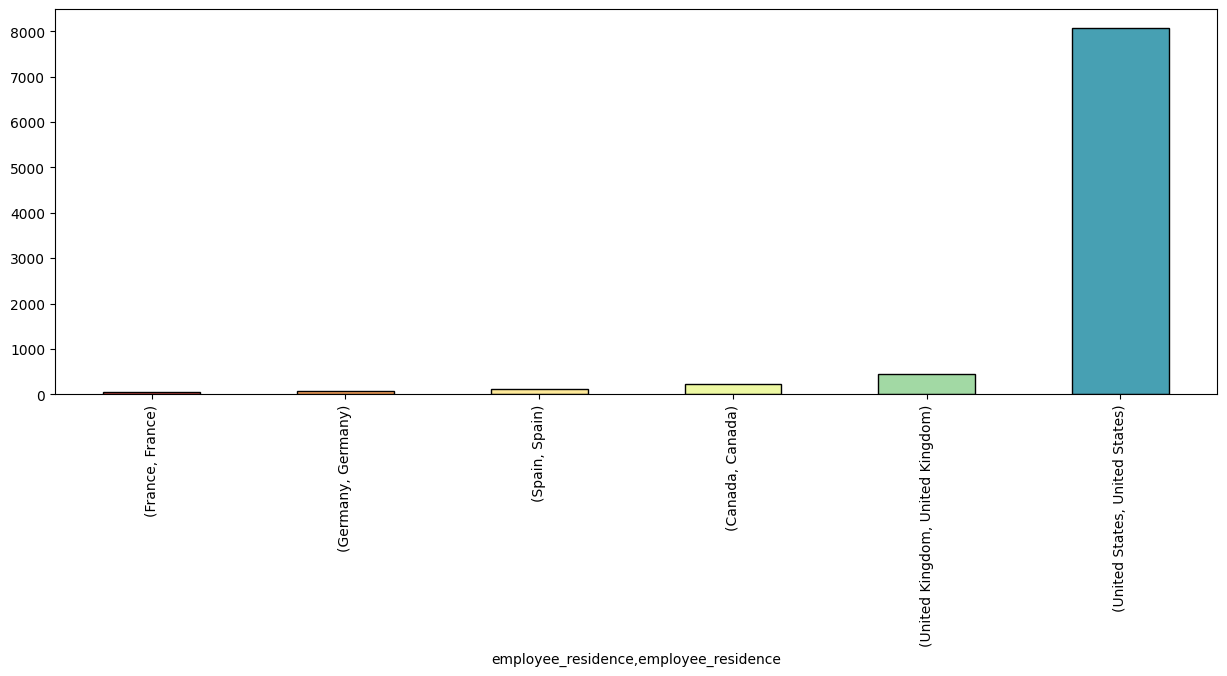

In [30]:
plt.figure(figsize=(15,5))

df.groupby("employee_residence")["employee_residence"].value_counts().sort_values().tail(6).plot(kind="bar",
                                                                                                   color=sns.color_palette('Spectral'),
                                                                                                  edgecolor="black")
plt.show()

**Observations:**

Most employees live in the USA. This relates to the data as most companies are also based in the USA.

##Data Normalization

In [33]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the salary_in_usd data and transform it
df['salary_in_usd_normalized'] = scaler.fit_transform(df[['salary_in_usd']])

# Now the 'salary_in_usd_normalized' column will contain the normalized values of the 'salary_in_usd' column
print(df[['salary_in_usd', 'salary_in_usd_normalized']].head())


   salary_in_usd  salary_in_usd_normalized
0          95012                  0.183936
1         186000                  0.393103
2          81800                  0.153563
3         212000                  0.452874
4          93300                  0.180000


#**Feature Engineering**

In [34]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size',
       'salary_in_usd_normalized'],
      dtype='object')

In [57]:
# Perform one-hot encoding for each categorical variable

# one_hot_encoded_category1 = pd.get_dummies(df['job_title'], prefix='job_title')
one_hot_encoded_category2 = pd.get_dummies(df['job_category'], prefix='job_category')
# one_hot_encoded_category3 = pd.get_dummies(df['employee_residence'], prefix='employee_residence')
one_hot_encoded_category4 = pd.get_dummies(df['experience_level'], prefix='experience_level')
# one_hot_encoded_category5 = pd.get_dummies(df['employment_type'], prefix='employment_type')
one_hot_encoded_category6 = pd.get_dummies(df['work_setting'], prefix='work_setting')
# one_hot_encoded_category7 = pd.get_dummies(df['company_location'], prefix='company_location')
one_hot_encoded_category8 = pd.get_dummies(df['company_size'], prefix='company_size')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded_category6, one_hot_encoded_category2, one_hot_encoded_category4, one_hot_encoded_category8], axis=1)

#**Training a Linear Regression Model**

In [58]:
df_encoded

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,...,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,experience_level_Entry-level,experience_level_Executive,experience_level_Mid-level,experience_level_Senior,company_size_L,company_size_M,company_size_S
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,...,0,0,0,0,0,1,0,1,0,0
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,...,0,0,0,0,0,0,1,0,1,0
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,...,0,0,0,0,0,0,1,0,1,0
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,...,1,0,0,0,0,0,1,0,1,0
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,...,0,0,0,0,0,0,1,1,0,0
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,...,1,0,0,0,0,0,1,1,0,0
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,...,1,0,0,0,0,1,0,1,0,0
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,...,1,0,0,1,0,0,0,0,0,1


In [59]:
# drop the previous categorical variables and keep the one-hot encoded ones
x = df_encoded.drop(['salary_in_usd_normalized','job_title', 'job_category', 'salary_currency', 'salary', 'salary_in_usd', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size'], axis=1)
y = df_encoded[['salary_in_usd_normalized']]

In [60]:
x

,work_year,work_setting_Hybrid,work_setting_In-person,work_setting_Remote,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,...,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,experience_level_Entry-level,experience_level_Executive,experience_level_Mid-level,experience_level_Senior,company_size_L,company_size_M,company_size_S
0,2023,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2023,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2023,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2023,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,2023,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
9351,2020,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
9352,2021,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9353,2020,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [61]:
y

,salary_in_usd_normalized
0,0.183936
1,0.393103
2,0.153563
3,0.452874
4,0.180000
...,...
9350,0.344828
9351,0.912644
9352,0.312644
9353,0.206897


In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

#**Model Evaluation**

In [65]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error training: {mse_train}')
print(f'Mean Squared Error testing: {mse_test}')
print(f'R-squared: {r2}')

Mean Squared Error training: 0.015595474512917335
Mean Squared Error testing: 0.015400449568290998
R-squared: 0.26509638053853135
